# Groupe M1 Machine Learbing:
### HARENA Antenaina Lucka
### HARINASANDRATRA Lahatra Fitiavana
### RABEASY Angelo
### RAFIDY Julie Tassia

# Data cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib 
import csv
import math

In [2]:
np.random.seed(42)

### Getting the data

In [3]:
#read the input data file
dataframe=pd.read_csv("johannesburg.csv")

pd.set_option('max_row',100)
pd.set_option('max_column',dataframe.shape[1])

#dataframe.columns = ["Listing number","Type of Property","Street Address","Erf Size","Floor Size","No Transfer Duty","Rates and Taxes","Age","Pets Allowed","Bedrooms","Bathrooms","Kitchens","Garage","Parking","Garden","Pool","Internet Access","Price"]

In [4]:
dataframe.head()

,Unnamed: 0,listing_number,type_of_property,street_address,erf_size,floor_size,no_transfer_duty,rates_and_taxes,age,pets_allowed,bedrooms,bathrooms,kitchens,garage,parking,garden,pool,internet_access,price,location,latitude,longitude
0,0,110066745,House,Waterkloof Ridge,NaN,NaN,Yes,NaN,1.0,Yes,3.0,2.0,1.0,2,NaN,NaN,NaN,Fibre,3900000.0,"Waterkloof Ridge,Gauteng,Johannesburg",-26.045632,28.00856
1,1,110962633,House,Mondeor,NaN,51 m²,Yes,R 750,NaN,No,2.0,NaN,NaN,NaN,Secure Parking,NaN,NaN,Fibre,665000.0,"Mondeor,Gauteng,Johannesburg",-26.276790,28.00635
2,2,110686036,House,Waverley,1 447 m²,421 m²,NaN,R 2 147,NaN,Yes,4.0,3.0,NaN,2,2,Yes,Yes,Fibre,5399000.0,"Waverley,Gauteng,Johannesburg",-26.137170,28.07654
3,3,110962127,House,Cyrildene,1 205 m²,385 m²,NaN,NaN,NaN,Yes,4.0,5.0,NaN,1,NaN,Yes,Yes,NaN,3300000.0,"Cyrildene,Gauteng,Johannesburg",-26.179020,28.10000
4,4,110549431,House,Sophiatown,545 m²,NaN,NaN,NaN,NaN,Yes,3.0,3.0,1.0,NaN,4,Yes,NaN,NaN,1295000.0,"Sophiatown,Gauteng,Johannesburg",-26.173830,27.97934


In [5]:
dataframe['garage'].unique()

array(['2', nan, '1', '6', 'Covered', ' ', 'Single', 'Garage', '3', '4',
       'Double, Electric Door', 'Double, Roll up, Covered',
       'Double, Electric Door, Covered', 'Double, Roll up, Tandem',
       'Double', '5', '3 Car parking', 'Double, Workshop',
       '3 to 4 vehicles', 'Electric Door, Tandem', 'Roll up, Single',
       'Electric Door', 'Roll up', 'Single, Tip up, Covered',
       'Electric Door, Single', 'Roll up, Single, Covered',
       'Electric Door, Single, Covered', 'Lockup garage carport.',
       'Double garage ', 'Double, Electric Door, Roll up',
       'Carport with lockable garage.', '8', 'Double, Roll up',
       'Roll up, Tandem', '10', '7', 'Single, Covered',
       'can fit up to 4 cars. ', 'Tandem', 'Exposed', '9',
       'Double, Electric Door, Roll up, Covered',
       'It has built-in units for storage', 'fits 4 cars',
       '0.0 Garage(s), Covered parking', '12', 'Double, Covered',
       'Electric Door, Roll up, Covered', 'tiled with shelving ',
  

In [6]:
dataframe = dataframe.drop('Unnamed: 0',axis=1)

In [7]:
dataframe['no_transfer_duty'].unique()

array(['Yes', nan], dtype=object)

In [8]:
dataframe_cleaned = pd.DataFrame()

In [9]:
#Remplace les caractéres qui se trouve dans char[] par un vide
def replace_in_dataframe(df, column, char):
    df[column] = df[column].str.replace(char[0], '') 
    df[column] = df[column].str.replace(char[1], '')
    change_row_to_numerical(df,column)
    
def write_to_csv(csv_filename, df):
    df.to_csv(csv_filename,index = False)
    
def change_row_to_numerical(df, column):
    df[column] = pd.to_numeric(df[column],errors='coerce')
    
def get_erf_floor_size(size):
    ''' This function will get the available surface area of the product with either the erf size or the floor size '''
    try:
        if type(size)==float:
            return size
        else:
            if size.split()[-1]!='m²':
                if size.split()[-1]=='ha':
                    size=size.split()
                    del size[-1]
                    new_size=float("".join(size))
                    new_size=new_size*100000   # converting acres to square meter
                else:
                    size=size.split()
                    del size[-1]
                    new_size=float("".join(size))
                    new_size=new_size*4046.856
                return new_size
            else:
                size=size.split()
                del size[-1]
                new_size=float("".join(size))
                return new_size
    except:
        return np.nan

def parse_price(str_price):
    ''' Function that parse the price in string with currency to an integer'''
    if type(str_price)==float:
        return str_price
    else:
        p=str_price.strip()
        p=str_price[1:].replace(" ","")
        try:
            return float(p)
        except:
            return np.nan

### Traitement des colonnes : Floor Size, Rates and Taxes

In [10]:
for i in range(dataframe.shape[0]):
    get_erf_floor_size(dataframe['erf_size'][i])
    
for i in range(dataframe.shape[0]):
    get_erf_floor_size(dataframe['floor_size'][i])

In [11]:
replace_in_dataframe(dataframe, 'floor_size', ['m²',' '])
replace_in_dataframe(dataframe, 'erf_size', ['m²',' '])
replace_in_dataframe(dataframe, 'rates_and_taxes', ['R',' '])

In [12]:
dataframe_cleaned['price'] = dataframe['price'] 

dataframe_cleaned['erf_size'] = dataframe['erf_size']

dataframe_cleaned['floor_size'] = dataframe['floor_size']

dataframe_cleaned['rates_and_taxes'] = dataframe['rates_and_taxes']

dataframe_cleaned['property_type'] = dataframe['type_of_property']

In [13]:
dataframe_cleaned.head()

,price,erf_size,floor_size,rates_and_taxes,property_type
0,3900000.0,NaN,NaN,NaN,House
1,665000.0,NaN,51.0,750.0,House
2,5399000.0,1447.0,421.0,2147.0,House
3,3300000.0,1205.0,385.0,NaN,House
4,1295000.0,545.0,NaN,NaN,House


In [14]:
dataframe_cleaned.describe()

,price,erf_size,floor_size,rates_and_taxes
count,1.051700e+04,6.078000e+03,5360.000000,6.088000e+03
mean,2.237931e+06,5.236216e+03,357.235075,1.919504e+03
std,3.538479e+06,1.537411e+05,10346.165578,3.425260e+04
min,1.250000e+03,1.000000e+00,1.000000,1.000000e+00
25%,7.500000e+05,4.950000e+02,62.000000,4.000000e+02
50%,1.300000e+06,7.730000e+02,99.000000,7.000000e+02
75%,2.499000e+06,1.487000e+03,197.000000,1.490250e+03
max,1.031000e+08,1.111111e+07,755000.000000,2.300000e+06


In [15]:
for col in dataframe:
    print(col)

listing_number
type_of_property
street_address
erf_size
floor_size
no_transfer_duty
rates_and_taxes
age
pets_allowed
bedrooms
bathrooms
kitchens
garage
parking
garden
pool
internet_access
price
location
latitude
longitude


In [16]:
data = dataframe[['bedrooms','bathrooms','kitchens','garage','parking','garden','pool','internet_access','no_transfer_duty','pets_allowed','age','street_address','location','latitude','longitude']]

In [17]:
data.head()

,bedrooms,bathrooms,kitchens,garage,parking,garden,pool,internet_access,no_transfer_duty,pets_allowed,age,street_address,location,latitude,longitude
0,3.0,2.0,1.0,2,NaN,NaN,NaN,Fibre,Yes,Yes,1.0,Waterkloof Ridge,"Waterkloof Ridge,Gauteng,Johannesburg",-26.045632,28.00856
1,2.0,NaN,NaN,NaN,Secure Parking,NaN,NaN,Fibre,Yes,No,NaN,Mondeor,"Mondeor,Gauteng,Johannesburg",-26.276790,28.00635
2,4.0,3.0,NaN,2,2,Yes,Yes,Fibre,NaN,Yes,NaN,Waverley,"Waverley,Gauteng,Johannesburg",-26.137170,28.07654
3,4.0,5.0,NaN,1,NaN,Yes,Yes,NaN,NaN,Yes,NaN,Cyrildene,"Cyrildene,Gauteng,Johannesburg",-26.179020,28.10000
4,3.0,3.0,1.0,NaN,4,Yes,NaN,NaN,NaN,Yes,NaN,Sophiatown,"Sophiatown,Gauteng,Johannesburg",-26.173830,27.97934


In [18]:
def triGarage(data):
    #for col in data['Garage'].unique():
    for i in range(data.shape[0]):
        if(type(data['garage'][i]) != float):
            if '0.0' in data['garage'][i] or 'parking' in (data['garage'][i]).lower():
                data['garage'][i] = 'No'
            elif (data['garage'][i] != 'No'):
                data['garage'][i] = 'Yes'
        else:
            data['garage'][i] = 'No'
                
triGarage(data)

<ipython-input-18-76a1624af8c7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['garage'][i] = 'Yes'
<ipython-input-18-76a1624af8c7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  triGarage(data)
<ipython-input-18-76a1624af8c7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['garage'][i] = 'No'
<ipython-input-18-76a1624af8c7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [19]:
def triParking(data):
    for i in range(data.shape[0]):
        if(type(data['parking'][i]) != float):
            if '0.0' in data['parking'][i] or 'garage' in (data['parking'][i]).lower():
                data['parking'][i] = 'No'
            elif (data['parking'][i] != 'No'):
                data['parking'][i] = 'Yes'
        else:
            data['parking'][i] = 'No'
                
triParking(data)

<ipython-input-19-e4ebd3387962>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['parking'][i] = 'No'
<ipython-input-19-e4ebd3387962>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  triParking(data)
<ipython-input-19-e4ebd3387962>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['parking'][i] = 'Yes'
<ipython-input-19-e4ebd3387962>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [20]:
data['parking'].value_counts()

Yes    6173
No     4429
Name: parking, dtype: int64

In [21]:
def triGarden(data):
    for i in range(data.shape[0]):
        if(type(data['garden'][i]) != float):
            data['garden'][i] = 'Yes'
        else:
            data['garden'][i] = 'No'
triGarden(data)

<ipython-input-21-b5095565047b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['garden'][i] = 'No'
<ipython-input-21-b5095565047b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  triGarden(data)
<ipython-input-21-b5095565047b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['garden'][i] = 'Yes'


In [22]:
data['garden'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
def triPool(data):
    for i in range(data.shape[0]):
        if(type(data['pool'][i]) != float):
            if "communal" in data['pool'][i]:
                data['pool'][i] = 'No'
            else: 
                data['pool'][i] = 'Yes'
        else:
            data['pool'][i] = 'No'
triPool(data)

<ipython-input-23-7023ad56661c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pool'][i] = 'No'
<ipython-input-23-7023ad56661c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  triPool(data)
<ipython-input-23-7023ad56661c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pool'][i] = 'Yes'
<ipython-input-23-7023ad56661c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

In [24]:
data['pool'].value_counts()

No     7408
Yes    3194
Name: pool, dtype: int64

In [25]:
def triInternet(data):
    for i in range(data.shape[0]):
        if(type(data['internet_access'][i]) != float):
            if "fibre" in (data['pool'][i]).lower():
                data['internet_access'][i] = 'Fibre'
            elif "satellite" in (data['internet_access'][i]).lower(): 
                data['internet_access'][i] = 'Satellite'
            elif "wimax" in (data['internet_access'][i]).lower(): 
                data['internet_access'][i] = 'Wimax'
            elif "adsl" in (data['internet_access'][i]).lower(): 
                data['internet_access'][i] = 'ADSL'
            elif "dial-up" in (data['internet_access'][i]).lower(): 
                data['internet_access'][i] = 'Dial-up'
        #else:
         #   data['Internet Access'][i] = 'No'
triInternet(data)

<ipython-input-25-d49105e9bc75>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['internet_access'][i] = 'Satellite'
<ipython-input-25-d49105e9bc75>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  triInternet(data)
<ipython-input-25-d49105e9bc75>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['internet_access'][i] = 'ADSL'
<ipython-input-25-d49105e9bc75>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [26]:
data['internet_access'].value_counts()

Fibre        814
Satellite    136
ADSL          98
Dial-up        3
Wimax          2
Name: internet_access, dtype: int64

In [27]:
#triGarage(ndata)
#fibre>satellite>wimax>adsl>dialup

for col in data['internet_access'].unique() :
    print(col)
data['pool'].value_counts()

Fibre
nan
Satellite
ADSL
Dial-up
Wimax


No     7408
Yes    3194
Name: pool, dtype: int64

In [28]:
dataframe_cleaned =  pd.concat([dataframe_cleaned,data],axis=1)

In [29]:
dataframe_cleaned

,price,erf_size,floor_size,rates_and_taxes,property_type,bedrooms,bathrooms,kitchens,garage,parking,garden,pool,internet_access,no_transfer_duty,pets_allowed,age,street_address,location,latitude,longitude
0,3900000.0,NaN,NaN,NaN,House,3.0,2.0,1.0,Yes,No,No,No,Fibre,Yes,Yes,1.0,Waterkloof Ridge,"Waterkloof Ridge,Gauteng,Johannesburg",-26.045632,28.00856
1,665000.0,NaN,51.0,750.0,House,2.0,NaN,NaN,No,Yes,No,No,Fibre,Yes,No,NaN,Mondeor,"Mondeor,Gauteng,Johannesburg",-26.276790,28.00635
2,5399000.0,1447.0,421.0,2147.0,House,4.0,3.0,NaN,Yes,Yes,Yes,Yes,Fibre,NaN,Yes,NaN,Waverley,"Waverley,Gauteng,Johannesburg",-26.137170,28.07654
3,3300000.0,1205.0,385.0,NaN,House,4.0,5.0,NaN,Yes,No,Yes,Yes,NaN,NaN,Yes,NaN,Cyrildene,"Cyrildene,Gauteng,Johannesburg",-26.179020,28.10000
4,1295000.0,545.0,NaN,NaN,House,3.0,3.0,1.0,No,Yes,Yes,No,NaN,NaN,Yes,NaN,Sophiatown,"Sophiatown,Gauteng,Johannesburg",-26.173830,27.97934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10597,710000.0,NaN,NaN,NaN,Townhouse,2.0,1.0,1.0,No,No,No,No,NaN,NaN,NaN,NaN,Kensington,"Kensington,Gauteng,Johannesburg",-26.192140,28.10992
10598,950000.0,NaN,NaN,NaN,Townhouse,2.0,2.0,1.0,No,Yes,No,Yes,NaN,NaN,No,NaN,Oakdene,"Oakdene,Gauteng,Johannesburg",-26.264600,28.05898
10599,5000000.0,NaN,NaN,NaN,Townhouse,12.0,6.0,1.0,No,No,Yes,No,NaN,NaN,NaN,NaN,Hills,"Hills,Gauteng,Johannesburg",-26.240520,28.02143
10600,990000.0,NaN,NaN,531.0,Townhouse,3.0,2.0,NaN,Yes,Yes,Yes,No,NaN,NaN,NaN,NaN,Elandspark,"Elandspark,Gauteng,Johannesburg",-26.241430,28.10461


In [30]:
dataframe_cleaned.head()

,price,erf_size,floor_size,rates_and_taxes,property_type,bedrooms,bathrooms,kitchens,garage,parking,garden,pool,internet_access,no_transfer_duty,pets_allowed,age,street_address,location,latitude,longitude
0,3900000.0,NaN,NaN,NaN,House,3.0,2.0,1.0,Yes,No,No,No,Fibre,Yes,Yes,1.0,Waterkloof Ridge,"Waterkloof Ridge,Gauteng,Johannesburg",-26.045632,28.00856
1,665000.0,NaN,51.0,750.0,House,2.0,NaN,NaN,No,Yes,No,No,Fibre,Yes,No,NaN,Mondeor,"Mondeor,Gauteng,Johannesburg",-26.276790,28.00635
2,5399000.0,1447.0,421.0,2147.0,House,4.0,3.0,NaN,Yes,Yes,Yes,Yes,Fibre,NaN,Yes,NaN,Waverley,"Waverley,Gauteng,Johannesburg",-26.137170,28.07654
3,3300000.0,1205.0,385.0,NaN,House,4.0,5.0,NaN,Yes,No,Yes,Yes,NaN,NaN,Yes,NaN,Cyrildene,"Cyrildene,Gauteng,Johannesburg",-26.179020,28.10000
4,1295000.0,545.0,NaN,NaN,House,3.0,3.0,1.0,No,Yes,Yes,No,NaN,NaN,Yes,NaN,Sophiatown,"Sophiatown,Gauteng,Johannesburg",-26.173830,27.97934


In [31]:
dataframe_cleaned = dataframe_cleaned.drop_duplicates()

In [32]:
dataframe_cleaned.to_csv("gauteng_cleaned.csv", index=False)

# Gauteng housing prediction

In [33]:
import pandas as pd
import numpy as np
import joblib
#import geopandas as gpd
import matplotlib.pyplot as plt
#from shapely.geometry import Point, Polygon
#import folium
import seaborn as sns

In [34]:
np.random.seed(42)

In [35]:
data = pd.read_csv('gauteng_cleaned.csv')

pd.set_option('max_column',data.shape[1])

# normalize columns name 
data.columns = data.columns.str.replace(' ','_')
data.columns = data.columns.str.lower()
df = data.copy()


In [36]:
df.head()

,price,erf_size,floor_size,rates_and_taxes,property_type,bedrooms,bathrooms,kitchens,garage,parking,garden,pool,internet_access,no_transfer_duty,pets_allowed,age,street_address,location,latitude,longitude
0,3900000.0,NaN,NaN,NaN,House,3.0,2.0,1.0,Yes,No,No,No,Fibre,Yes,Yes,1.0,Waterkloof Ridge,"Waterkloof Ridge,Gauteng,Johannesburg",-26.045632,28.00856
1,665000.0,NaN,51.0,750.0,House,2.0,NaN,NaN,No,Yes,No,No,Fibre,Yes,No,NaN,Mondeor,"Mondeor,Gauteng,Johannesburg",-26.276790,28.00635
2,5399000.0,1447.0,421.0,2147.0,House,4.0,3.0,NaN,Yes,Yes,Yes,Yes,Fibre,NaN,Yes,NaN,Waverley,"Waverley,Gauteng,Johannesburg",-26.137170,28.07654
3,3300000.0,1205.0,385.0,NaN,House,4.0,5.0,NaN,Yes,No,Yes,Yes,NaN,NaN,Yes,NaN,Cyrildene,"Cyrildene,Gauteng,Johannesburg",-26.179020,28.10000
4,1295000.0,545.0,NaN,NaN,House,3.0,3.0,1.0,No,Yes,Yes,No,NaN,NaN,Yes,NaN,Sophiatown,"Sophiatown,Gauteng,Johannesburg",-26.173830,27.97934


## Exploratory data analysis

### Analyse de forme

- **La variable target est price** 

In [37]:
print(f"{df.shape[0]} lignes et {df.shape[1]} colonnes dans le dataset")

8788 lignes et 20 colonnes dans le dataset


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8788 entries, 0 to 8787
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             8715 non-null   float64
 1   erf_size          4880 non-null   float64
 2   floor_size        4608 non-null   float64
 3   rates_and_taxes   5070 non-null   float64
 4   property_type     8788 non-null   object 
 5   bedrooms          7519 non-null   float64
 6   bathrooms         7592 non-null   float64
 7   kitchens          3448 non-null   float64
 8   garage            8788 non-null   object 
 9   parking           8788 non-null   object 
 10  garden            8788 non-null   object 
 11  pool              8788 non-null   object 
 12  internet_access   918 non-null    object 
 13  no_transfer_duty  532 non-null    object 
 14  pets_allowed      4367 non-null   object 
 15  age               267 non-null    float64
 16  street_address    8788 non-null   object 


- **types de variables**: 10 variables de type float et 10 variables de type object

<AxesSubplot:>

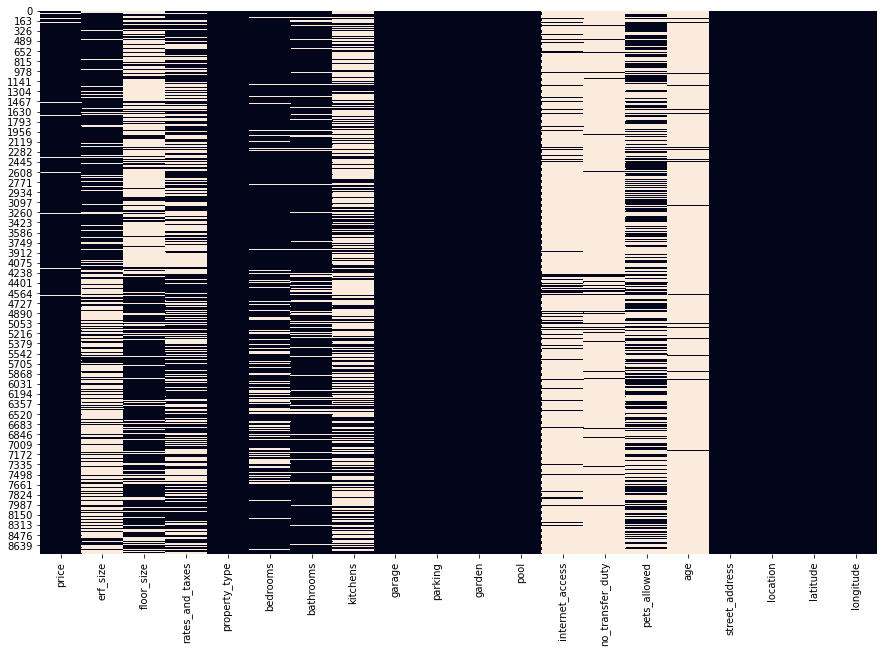

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),cbar=False)

In [40]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

parking             0.000000
location            0.000000
street_address      0.000000
pool                0.000000
garden              0.000000
latitude            0.000000
garage              0.000000
longitude           0.000000
property_type       0.000000
price               0.008307
bathrooms           0.136095
bedrooms            0.144401
rates_and_taxes     0.423077
erf_size            0.444697
floor_size          0.475649
pets_allowed        0.503072
kitchens            0.607647
internet_access     0.895539
no_transfer_duty    0.939463
age                 0.969618
dtype: float64

In [41]:
(df.isna().sum()/df.shape[0]).sum()/df.shape[1]

0.27737824305871644

- **analyse des valeurs manquantes**: 
- il y a 3 variables dont + de 90% des valeurs sont manquantes 
- 5 variables de 40 à 60% de valeurs manquantes
- 10 variables fournissent des données complètes.
- On en déduit que le dataset fournit des données assez complètes puique 30% seulement sont manquantes.

### Analyse de forme

Voici les descriptions des variables numériques 

In [42]:
df.describe()

,price,erf_size,floor_size,rates_and_taxes,bedrooms,bathrooms,kitchens,age,latitude,longitude
count,8.715000e+03,4.880000e+03,4608.000000,5.070000e+03,7519.000000,7592.000000,3448.000000,267.000000,8788.000000,8788.000000
mean,2.189168e+06,5.624865e+03,374.162326,2.023209e+03,3.417343,2.304268,1.172274,363.112360,-26.209140,28.023556
std,3.500068e+06,1.698115e+05,11157.516972,3.749821e+04,4.134838,2.348552,1.448233,740.575322,0.072198,0.069107
min,1.250000e+03,1.000000e+00,1.000000,1.000000e+00,0.500000,0.500000,1.000000,1.000000,-26.425930,27.804050
25%,7.370000e+05,4.950000e+02,60.000000,4.000000e+02,2.000000,1.000000,1.000000,5.500000,-26.259650,28.006350
50%,1.290000e+06,7.590000e+02,97.000000,7.000000e+02,3.000000,2.000000,1.000000,23.000000,-26.196560,28.039540
75%,2.400000e+06,1.487000e+03,180.000000,1.408500e+03,4.000000,2.500000,1.000000,72.000000,-26.162580,28.062360
max,1.031000e+08,1.111111e+07,755000.000000,2.300000e+06,152.000000,80.000000,53.000000,2022.000000,-25.991600,28.138590


## Visualization of the houses prices

In [43]:
street_map=gpd.read_file("JHB/electoral wards for jhb.shp")
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df,geometry = geometry)

NameError: name 'gpd' is not defined

In [ ]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.3,color='grey')# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='price',ax=ax,alpha=1, legend=True,markersize=150,vmin=1.25e+03,vmax=1e+07)# add title to graph
plt.title('Housig Prices in Johannesburg', fontsize=15,fontweight='bold')# set latitiude and longitude boundaries for map display
plt.show()



Distribution de la variable price

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('bmh')

df['price'].hist(bins=300,rwidth = 1,figsize=(10,8))
plt.title('House Prices')
plt.show()

- **Visualisation de la target:**
- La variable price est distribuée asymétriquement.
- Elle varie de 1250 à 103100000
- Une majeure partie des maisons ont un prix autour 5000000.
- Mais il existe des outliers qu'il faut traiter avant d'avoir un modèle de prédiction.

#### Variables continues

In [ ]:
f, ax = plt.subplots(7, figsize=(7,40))
sns.distplot(df['rates_and_taxes'],color='r',ax=ax[0])
sns.distplot(df.bedrooms,color='r',ax=ax[1])
sns.distplot(df.bathrooms,color='r',ax=ax[2])
sns.distplot(df.kitchens,color='r',ax=ax[3])
sns.distplot(df.age,color='r',ax=ax[4])
sns.distplot(df['erf_size'],color='r',ax=ax[5])
sns.distplot(df['floor_size'],color='r',ax=ax[6])

ax[0].set_title('Rates and Taxes')
ax[1].set_title('Bedrooms')
ax[2].set_title('Bathrooms')
ax[3].set_title('Kitchens')
ax[4].set_title('Age')
ax[5].set_title('Erf Size')
ax[6].set_title('Floor Size')


- Plus de la moitié des taxes des maisons ont une valeur aux alentours de 125000 et la variable Rate and Taxe n'est pas normalement distribuée.
- La variable Bedrooms est également asymétrique et la plupart des maisons se retrouve avec des chambres à coucher autour de 5.
- Distribution asymétrique de la variable Bathrooms dont la plupart des valeurs se situe entre 0 et 10 
- Nombreux valeurs de la variable Kitchens se trouve entre 0 et 5 
- Les données montrent que sur les maisons présentes dans les données sont assez récentes .Et les données montrent aussi qu'il existe quelques maisons avec plus de 2000ans.
- La variable Erf Size montre une distribution asymétrique et la majorité des données se situe entre 0 et O.O25 m²
- Les données de la variable Floor size montrent que la plupart ont des surfaces moins de 5000m²

#### Variables discrètes

In [ ]:
for col in df.select_dtypes('object'):
    print(f'{col:-<50} {df[col].unique() }')

In [ ]:
for col in df.select_dtypes(object):
    if(col != 'location') & (col != 'street_address'):
        plt.figure()
        df[col].value_counts().plot.pie()

- Il y a 3 grandes types de propriétés dont près de la moitié est de type House
- La fibre est accessible dans 3/4 des maisons tandis qu'une petite partie des maisons se retrouve avec la Dial-Up et la Wimax
- Les autres variables sont de types binaires.


### Analyse de fond

#### Relation Target/Variables continues

In [ ]:
for col in df.select_dtypes(float):
    if (col != 'price') & (col != 'erf_size') & (col != 'floor_size') & (col != 'rates_and_taxes'):
        fig ,ax = plt.subplots(figsize=(5,5))
        ax.scatter(x=df[col],y=df['price'])
        plt.ylabel('price',fontsize=15)
        plt.xlabel(col,fontsize=15)

In [ ]:
fig ,ax = plt.subplots(3, figsize=(7,15))
ax[0].scatter(x=df['floor_size'],y=df['price'])
ax[0].axis([0,20000,min(df['price']),max(df['price'])])
ax[1].scatter(x=df['erf_size'],y=df['price'])
ax[1].axis([0,20000,min(df['price']),max(df['price'])])
ax[2].scatter(x=df['rates_and_taxes'],y=df['price'])
ax[2].axis([0,20000,min(df['price']),max(df['price'])])

ax[0].set_title('Floor Size')
ax[1].set_title('Erf Size')
ax[2].set_title('Rates and Taxes')

A première vue, aucune variable numérique n'est en rapport avec la variable target price.

In [ ]:
fig ,ax = plt.subplots()
ax.scatter(x=df['longitude'],y=df['latitude'])
#ax.axis([0,20000,min(df['price']),max(df['price'])])

On observe que les gens ont une tendance à acheter des maisons dans la région Nord-Est

#### Relation Target/Variables discrètes

- Target/property_type

In [ ]:
plt.figure(figsize=(12,8))
sns.boxenplot(x='property_type',y='price',data=df,palette='rainbow')
plt.title('Price by type of property')

- Le prix moyen entre les 3 types est à peu près égal.
- La différence des prix de maison entre house et apartment n'est pas trop grande mais excède les types townhouse. De plus, le prix des maisons varie beaucoup sur ces 2 types.
- El il existe certains outliers qui se distinguent.

In [ ]:
plt.figure(figsize=(12,8))
sns.boxenplot(x='internet_access',y='price',data=df,palette='rainbow')
plt.title('Price by internet access')

- Le prix des maisons avec la fibre varie beaucoup.
- Les maisons avec accès à la fibre sont plus chers que les autres .
- Les maisons avec fibre et Satellite sont les plus demandées.
- Le prix moyen des maisons ne se différencie pas beaucoup selon le type d'accès internet.
- Il y a quand même quelques outliers 

- Target/others

In [ ]:
for col in df['property_type'].unique():
    with_garage = df[(df['garage'] == "Yes") & (df['property_type'] == col)]
    no_garage = df[(df['garage'] == "No") & (df['property_type'] ==col)]

    plt.figure(figsize=(20,10))
    sns.distplot(with_garage['price'],color='r',label='with garage')
    sns.distplot(no_garage['price'],color='b',label='no garage')
    plt.title(f"Price by type {col}")
    plt.legend()

Il semble que le prix des maisons sans garage soit plus cher que celles avec garage surtout dans les townhouse mais il y a quand même une différence non-négligeable dans apartement.
La différence est minime voire inexistante dans les maisons de type house.


In [ ]:
for col in df['property_type'].unique():
    with_parking = df[(df['parking'] == "Yes") & (df['property_type'] == col)]
    no_parking = df[(df['parking'] == "No") & (df['property_type'] == col)]

    plt.figure(figsize=(20,10))
    sns.distplot(with_parking['price'],color='r',label='with parking')
    sns.distplot(no_parking['price'],color='b',label='no parking')
    plt.title(f"Price by type {col}")
    plt.legend()

Légère différence de prix de maisons avec et sans parking dans les types House et différence assez grande dans les types Townhouse.Par contre aucune différence de prix dans les types Apartment

In [ ]:
for col in df['property_type'].unique():
    with_garden = df[(df['garden'] == "Yes") & (df['property_type'] == col)]
    no_garden = df[(df['garden'] == "No") & (df['property_type'] == col)]

    plt.figure(figsize=(20,10))
    sns.distplot(with_garden['price'],color='r',label='with garden')
    sns.distplot(no_garden['price'],color='b',label='no garden')
    plt.title(f"Price by type {col}")
    plt.legend()

Prix semblable pour tout type de maisons avec ou sans jardin.

In [ ]:
for col in df['property_type'].unique():
    with_pool = df[(df['pool'] == "Yes") & (df['property_type'] == col)]
    no_pool = df[(df['pool'] == "No") & (df['property_type'] == col)]

    plt.figure(figsize=(20,10))
    sns.distplot(with_pool['price'],color='r',label='with pool')
    sns.distplot(no_pool['price'],color='b',label='no pool')
    plt.title(f"Price by type {col}")
    plt.legend()

Les maisons avec piscine se font plus chères dans les House et les Townhouse.
Le prix est plus ou moins égal dans les Apartment.


In [ ]:
for col in df['property_type'].unique():
    with_pets = df[(df['pets_allowed'] == "Yes") & (df['property_type'] == col)]
    no_pets = df[(df['pets_allowed'] == "No") & (df['property_type'] == col)]

    plt.figure(figsize=(20,10))
    sns.distplot(with_pets['price'],color='r',label='with pets')
    sns.distplot(no_pets['price'],color='b',label='no pets')
    plt.title(f"Price by type {col}")
    plt.legend()

L'interdiction ou non des animaux domestiques dans les maisons de type house sont négligeables.
Dans les Apartment, il y a une légère différence mais il y a une large différence entre les prix des maisons avec ou sans interdiction sur les Townhouse.

### Analyse en profondeur

#### Relation entre variable continue

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='magma')

- Bedrooms / bathrooms , bedrooms/ kitchens et bathrooms/kitchens semblent lier.

#### Relation property_type/variable continue

In [ ]:
house = df[df['property_type'] == 'House']
apartment = df[df['property_type'] == 'Apartment / Flat']
townhouse = df[df['property_type'] == 'Townhouse']

In [ ]:
for col in df.select_dtypes(float):
    if(col != 'price'):
        plt.figure(figsize=(20,10))
        sns.distplot(house[col],color='g',label='house')
        sns.distplot(apartment[col],label='apartment')
        sns.distplot(townhouse[col],label='townhouse')
        plt.legend()

- La erf size d'un apartment et house diffère largement des deux autres.
- Le floor size d'un townhouse est 10 fois supérieur à celui d'un apartment.
- Les taxes des townhouse sont très chers contrairement aux house qui sont beaucoup plus abordables .
- Les maisons de type house et apartment ont des bedrooms semblables mais les townhouse ont des bedrooms supérieurs aux deux autres.
- Le nombre de bathroom des différents types est plus ou moins égal.
- House et apartment ont des kitchens  égaux mais les townhouse ont des kitchens plus élévés.
- Pas beaucoup de différence entre l'âge des maisons on distingue quand même que les apartment récents sont plus nombreux que les townhouse et house.

#### Relation internet_access/variable continue

In [ ]:
fibre = df[df['internet_access'] == 'Fibre']
satellite = df[df['internet_access'] == 'Satellite']
adsl = df[df['internet_access'] == 'ADSL']
dialup = df[df['internet_access'] == 'Dial-up']
wimax = df[df['internet_access'] == 'Wimax']

In [ ]:
for col in df.select_dtypes(float):
    if(col != 'price'):
        plt.figure(figsize=(20,10))
        sns.distplot(fibre[col],color='b',label='fibre')
        sns.distplot(satellite[col],label='satellite')
        sns.distplot(adsl[col],label='adsl')
        sns.distplot(dialup[col],label='dialup')
        sns.distplot(wimax[col],label='wimax')

        plt.legend()

- aucun rapport entre le nombre de erf size et le type d'internet
- la floor size des maisons avec dialup est proche de nulle  
- aucun rapport entre taxes et type d'internet


#### Relation variables discrètes/variables continues

In [ ]:
for col in df.select_dtypes(float):
    if(col != 'price') & (col != 'longitude') & (col != 'latitude'):
        for cat in df.select_dtypes(object):
            if(cat != 'property_type') & (cat != 'internet_access') & (cat != 'street_address') & (cat != 'location'):
                with_ = df[(df[cat] == "Yes")]
                no_ = df[(df[cat] == "No")]
                plt.figure(figsize=(20,10))
                sns.distplot(with_[col],color='r',label='with')
                sns.distplot(no_[col],color='b',label='no')
                plt.title(f"{col} by {cat}")

                plt.legend()

#### Relation variables discrètes/variables discrètes

In [ ]:
for col in df.select_dtypes(object):
    plt.figure()
    if (col != 'street_address') & (col != 'location'):
        sns.heatmap(pd.crosstab(df[col],df['property_type']),annot=True,fmt="d")

In [ ]:
for col in df.select_dtypes(object):
    plt.figure()
    if (col != 'street_address') & (col != 'property_type') & (col != 'location'):
        sns.heatmap(pd.crosstab(df[col],df['garage']),annot=True,fmt="d")

In [ ]:
for col in df.select_dtypes(object):
    plt.figure()
    if (col != 'street_address') & (col != 'property_type') & (col != 'garage')& (col != 'location'):
        sns.heatmap(pd.crosstab(df[col],df['parking']),annot=True,fmt="d")

In [ ]:
for col in df.select_dtypes(object):
    plt.figure()
    if(col != 'street_address') & (col != 'property_type') & (col != 'garage') & (col != 'parking')& (col != 'location') :
        sns.heatmap(pd.crosstab(df[col],df['garden']),annot=True,fmt="d")

In [ ]:
for col in df.select_dtypes(object):
    plt.figure()
    if(col != 'street_address') & (col != 'property_type') & (col != 'garage') & (col != 'parking') & (col != 'garden')& (col != 'location'):
        sns.heatmap(pd.crosstab(df[col],df['pool']),annot=True,fmt="d")

In [ ]:
for col in df.select_dtypes(object):
    plt.figure()
    if(col != 'street_address') & (col != 'property_type') & (col != 'garage') & (col != 'parking') & (col != 'garden') & (col != 'pool')& (col != 'location'):
        sns.heatmap(pd.crosstab(df[col],df['internet_access']),annot=True,fmt="d")

In [ ]:
for col in df.select_dtypes(object):
    plt.figure()
    if(col != 'street_address') & (col != 'property_type') & (col != 'garage') & (col != 'parking') & (col != 'garden') & (col != 'pool') & (col != 'internet_access')& (col != 'location'):
        sns.heatmap(pd.crosstab(df[col],df['no_transfer_duty']),annot=True,fmt="d")

In [ ]:
for col in df.select_dtypes(object):
    plt.figure()
    if(col != 'street_address') & (col != 'property_type') & (col != 'garage') & (col != 'parking') & (col != 'garden') & (col != 'pool') & (col != 'internet_access') & (col != 'no_transfer_duty')& (col != 'location'):
        sns.heatmap(pd.crosstab(df[col],df['pets_allowed']),annot=True,fmt="d")

In [ ]:
for col in df:
    #if (col != 'property_type') & (col != 'price') & (col != 'area_size'):
    plt.figure(figsize=(12,8))
    sns.boxplot(x=col,y='price',data=df,palette='rainbow')

## PREPROCESSING

In [ ]:
df1 = data.copy()
df1.head()

In [ ]:
key_columns = ['price','erf_size','floor_size','rates_and_taxes','property_type','bedrooms','bathrooms','kitchens','garage','parking','garden','pool','internet_access','pets_allowed','latitude','longitude']

In [ ]:
df1 = df1[key_columns]

In [ ]:
df1.head()

### TrainTest-Nettoyage-Encodage

#### TrainTest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
trainset,testset = train_test_split(df1,test_size=0.2,random_state=0)

In [ ]:
trainset.shape

In [ ]:
testset.shape

In [ ]:
df1.head()

#### Encodage

In [ ]:
def encodage(df):
    encoder = OneHotEncoder()
    encoder_df = pd.DataFrame(encoder.fit_transform(df[['property_type']]).toarray())
    df = df.join(encoder_df)
    df.columns = ['price', 'erf_size', 'floor_size', 'rates_and_taxes','property_type','bedrooms','bathrooms','kitchens','garage','parking','garden','pool','internet_access','pets_allowed','latitude','longitude','house','apartment','townhouse']
    df = df.drop('property_type',axis=1)

    return df

def encodage_1(df):
    code = {
        'No':0,
        'Yes':1,
        'Fibre':0,
        'Satellite':1,
        'ADSL':2,
        'Dial-up':3,
        'Wimax':4
    }
    for col in df.select_dtypes(object):
        df.loc[:,col] = df[col].map(code)
    return df

def encodage_2(df):
    for col in df.select_dtypes(float):
        df[col] = np.log(df[col])

In [ ]:
def imputation(df):
    df.fillna(df.median(), inplace=True)
    return df #dropna(axis=0)

In [ ]:
def preprocessing(df):
    df = encodage(df)
    df = encodage_1(df)
    
    df = imputation(df)
    #df = encodage_2(df)
    
    X = df.drop('price',axis=1)
    y = df['price']
    print(y.shape)
    return X,y

In [ ]:
X_train,y_train = preprocessing(trainset)

In [ ]:
X_test,y_test = preprocessing(testset)

## MODELISATION

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression
from sklearn.preprocessing import RobustScaler,PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
preprocessor = make_pipeline(PolynomialFeatures(3),RobustScaler(),SelectKBest(mutual_info_regression,k=15))

### Procédure d'évaluation

In [ ]:
from sklearn.metrics import *
from sklearn.model_selection import learning_curve

In [ ]:
def evaluation(model):
    model.fit(X_train,y_train)
    val_score = cross_val_score(model,X_train,y_train,scoring='r2',cv=4)
    #print('score:',model.score(X_train,y_train))
    print('Validation error:',val_score.mean())

    
    """N,train_score,val_score = learning_curve(model,X_train,y_train,
                                             cv=4,scoring='r2',
                                            train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(10,5))
    plt.plot(N,train_score.mean(axis=1),label='train_score')
    plt.plot(N,val_score.mean(axis=1),label='val_score')
    plt.legend()"""

In [ ]:
RandomForest = make_pipeline(preprocessor,RandomForestRegressor(random_state=0))
KNN = make_pipeline(preprocessor,KNeighborsRegressor())
GradientBoost = make_pipeline(preprocessor,GradientBoostingRegressor(random_state=0))
AdaBoost = make_pipeline(preprocessor,AdaBoostRegressor(random_state=0))
SVR = make_pipeline(preprocessor,SVR(kernel='poly'))
XGBoost = make_pipeline(preprocessor,XGBRegressor())

In [ ]:
dict_of_models = {
                   'RandomForest': RandomForest,
                   'KNN': KNN,
                   'GradientBoost': GradientBoost,
                   'AdaBoost': AdaBoost,
                   'XGBoost': XGBoost
                 }

In [ ]:
for name,model in dict_of_models.items():
    print(name)
    evaluation(model)

## OPTIMISATION

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
hyper_params = {
    'gradientboostingregressor__n_estimators': [500,1000,2000],
    'gradientboostingregressor__learning_rate':[0.001,0.01,0.1],
    'gradientboostingregressor__max_depth': [1,2,4],
    'gradientboostingregressor__subsample':[0.5,0.75,1],
}
grid = GridSearchCV(GradientBoost,hyper_params,scoring='r2',n_jobs=1,cv=4)

grid.fit(X_train,y_train)

In [ ]:
print(grid.best_params_)

print(grid.best_estimator_.score(X_test,y_test))

In [ ]:
GradientBoost.score(X_test,y_test)

In [ ]:
RandomForest.score(X_test,y_test)